# EDA recommendation and hypothesis results

In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Reading master data

In [2]:
master_data=pd.read_csv("datasets/master_data.csv")
master_data

,Unnamed: 0,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,0,10000011,42377,Pink Cab,ATLANTA GA,0.644357,-0.191317,0.173709,29290,Card,"814,885","24,701",Male,28,10813
1,1,10351127,43302,Yellow Cab,ATLANTA GA,0.296133,0.638741,0.197683,29290,Cash,"814,885","24,701",Male,28,10813
2,2,10412921,43427,Yellow Cab,ATLANTA GA,1.633444,1.343424,1.969777,29290,Card,"814,885","24,701",Male,28,10813
3,3,10000012,42375,Pink Cab,ATLANTA GA,0.494768,-0.236620,0.308012,27703,Card,"814,885","24,701",Male,27,9237
4,4,10320494,43211,Yellow Cab,ATLANTA GA,1.129091,1.084840,1.145168,27703,Card,"814,885","24,701",Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,10307228,43162,Yellow Cab,WASHINGTON DC,1.294211,0.894701,1.513492,51406,Cash,"418,859","127,001",Female,29,6829
359388,359388,10319775,43203,Yellow Cab,WASHINGTON DC,-1.552887,-1.296907,-1.529409,51406,Cash,"418,859","127,001",Female,29,6829
359389,359389,10347676,43287,Yellow Cab,WASHINGTON DC,0.072975,-0.333384,0.326810,51406,Card,"418,859","127,001",Female,29,6829
359390,359390,10358624,43314,Yellow Cab,WASHINGTON DC,0.411390,-0.237676,0.494513,51406,Cash,"418,859","127,001",Female,29,6829


# Master Data basic information

In [3]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          359392 non-null  int64  
 1   Transaction ID      359392 non-null  int64  
 2   Date of Travel      359392 non-null  int64  
 3   Company             359392 non-null  object 
 4   City                359392 non-null  object 
 5   KM Travelled        359392 non-null  float64
 6   Price Charged       359392 non-null  float64
 7   Cost of Trip        359392 non-null  float64
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
 12  Gender              359392 non-null  object 
 13  Age                 359392 non-null  int64  
 14  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(6), object(6)

# Rename master data columns name 

In [4]:
for col in master_data.columns:
    if ' ' in col:
        master_data = master_data.rename(columns={col:col.replace(' ','_')})


     


# Define date format function for monthly analysis

In [5]:
from datetime import datetime, timedelta

def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date


In [21]:
months=[]
years =[]
for i in range(len(master_data['Date_of_Travel'])):
    months.append(master_data['Date_of_Travel'][i].month)
    years.append(master_data['Date_of_Travel'][i].year)
master_data['Month'] = months
master_data['Year'] = years

master_data.drop('Date_of_Travel', axis=1, inplace=True)


In [23]:
master_data

,Unnamed:_0,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month),Month,Year
0,0,10000011,Pink Cab,ATLANTA GA,0.644357,-0.191317,0.173709,29290,Card,"814,885","24,701",Male,28,10813,1,2016
1,1,10351127,Yellow Cab,ATLANTA GA,0.296133,0.638741,0.197683,29290,Cash,"814,885","24,701",Male,28,10813,7,2018
2,2,10412921,Yellow Cab,ATLANTA GA,1.633444,1.343424,1.969777,29290,Card,"814,885","24,701",Male,28,10813,11,2018
3,3,10000012,Pink Cab,ATLANTA GA,0.494768,-0.236620,0.308012,27703,Card,"814,885","24,701",Male,27,9237,1,2016
4,4,10320494,Yellow Cab,ATLANTA GA,1.129091,1.084840,1.145168,27703,Card,"814,885","24,701",Male,27,9237,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,359387,10307228,Yellow Cab,WASHINGTON DC,1.294211,0.894701,1.513492,51406,Cash,"418,859","127,001",Female,29,6829,3,2018
359388,359388,10319775,Yellow Cab,WASHINGTON DC,-1.552887,-1.296907,-1.529409,51406,Cash,"418,859","127,001",Female,29,6829,4,2018
359389,359389,10347676,Yellow Cab,WASHINGTON DC,0.072975,-0.333384,0.326810,51406,Card,"418,859","127,001",Female,29,6829,7,2018
359390,359390,10358624,Yellow Cab,WASHINGTON DC,0.411390,-0.237676,0.494513,51406,Cash,"418,859","127,001",Female,29,6829,8,2018


# Split the master data company column pink cab, yellow cab

In [7]:
PinkCab = master_data[master_data['Company']=='Pink Cab']
YellowCab = master_data[master_data['Company']=='Yellow Cab']

PinkCab

,Unnamed:_0,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Population,Users,Gender,Age,Income_(USD/Month)
0,0,10000011,2016-01-07,Pink Cab,ATLANTA GA,0.644357,-0.191317,0.173709,29290,Card,"814,885","24,701",Male,28,10813
3,3,10000012,2016-01-05,Pink Cab,ATLANTA GA,0.494768,-0.236620,0.308012,27703,Card,"814,885","24,701",Male,27,9237
6,6,10395626,2018-10-26,Pink Cab,ATLANTA GA,-0.750173,-0.934524,-0.913051,27703,Card,"814,885","24,701",Male,27,9237
7,7,10000013,2016-01-01,Pink Cab,ATLANTA GA,-1.105754,-1.086978,-1.193455,28712,Cash,"814,885","24,701",Male,53,11242
11,11,10000014,2016-01-06,Pink Cab,ATLANTA GA,0.866697,-0.167809,0.414016,28020,Cash,"814,885","24,701",Male,23,23327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359332,359332,10200082,2017-07-22,Pink Cab,WASHINGTON DC,-0.191053,-0.276491,-0.428537,52425,Cash,"418,859","127,001",Male,58,10737
359346,359346,10262863,2017-11-18,Pink Cab,WASHINGTON DC,-1.481771,-1.317499,-1.491037,51257,Card,"418,859","127,001",Male,39,15247
359356,359356,10417014,2018-12-01,Pink Cab,WASHINGTON DC,1.502655,0.516173,0.935988,51257,Card,"418,859","127,001",Male,39,15247
359358,359358,10197277,2017-07-22,Pink Cab,WASHINGTON DC,0.823373,-0.175572,0.523072,51510,Card,"418,859","127,001",Female,18,6855


# Pink cab company monthly analysis

In [26]:
plot0 = master_data[master_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0



Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

# Visualize pink cab company montly analysis

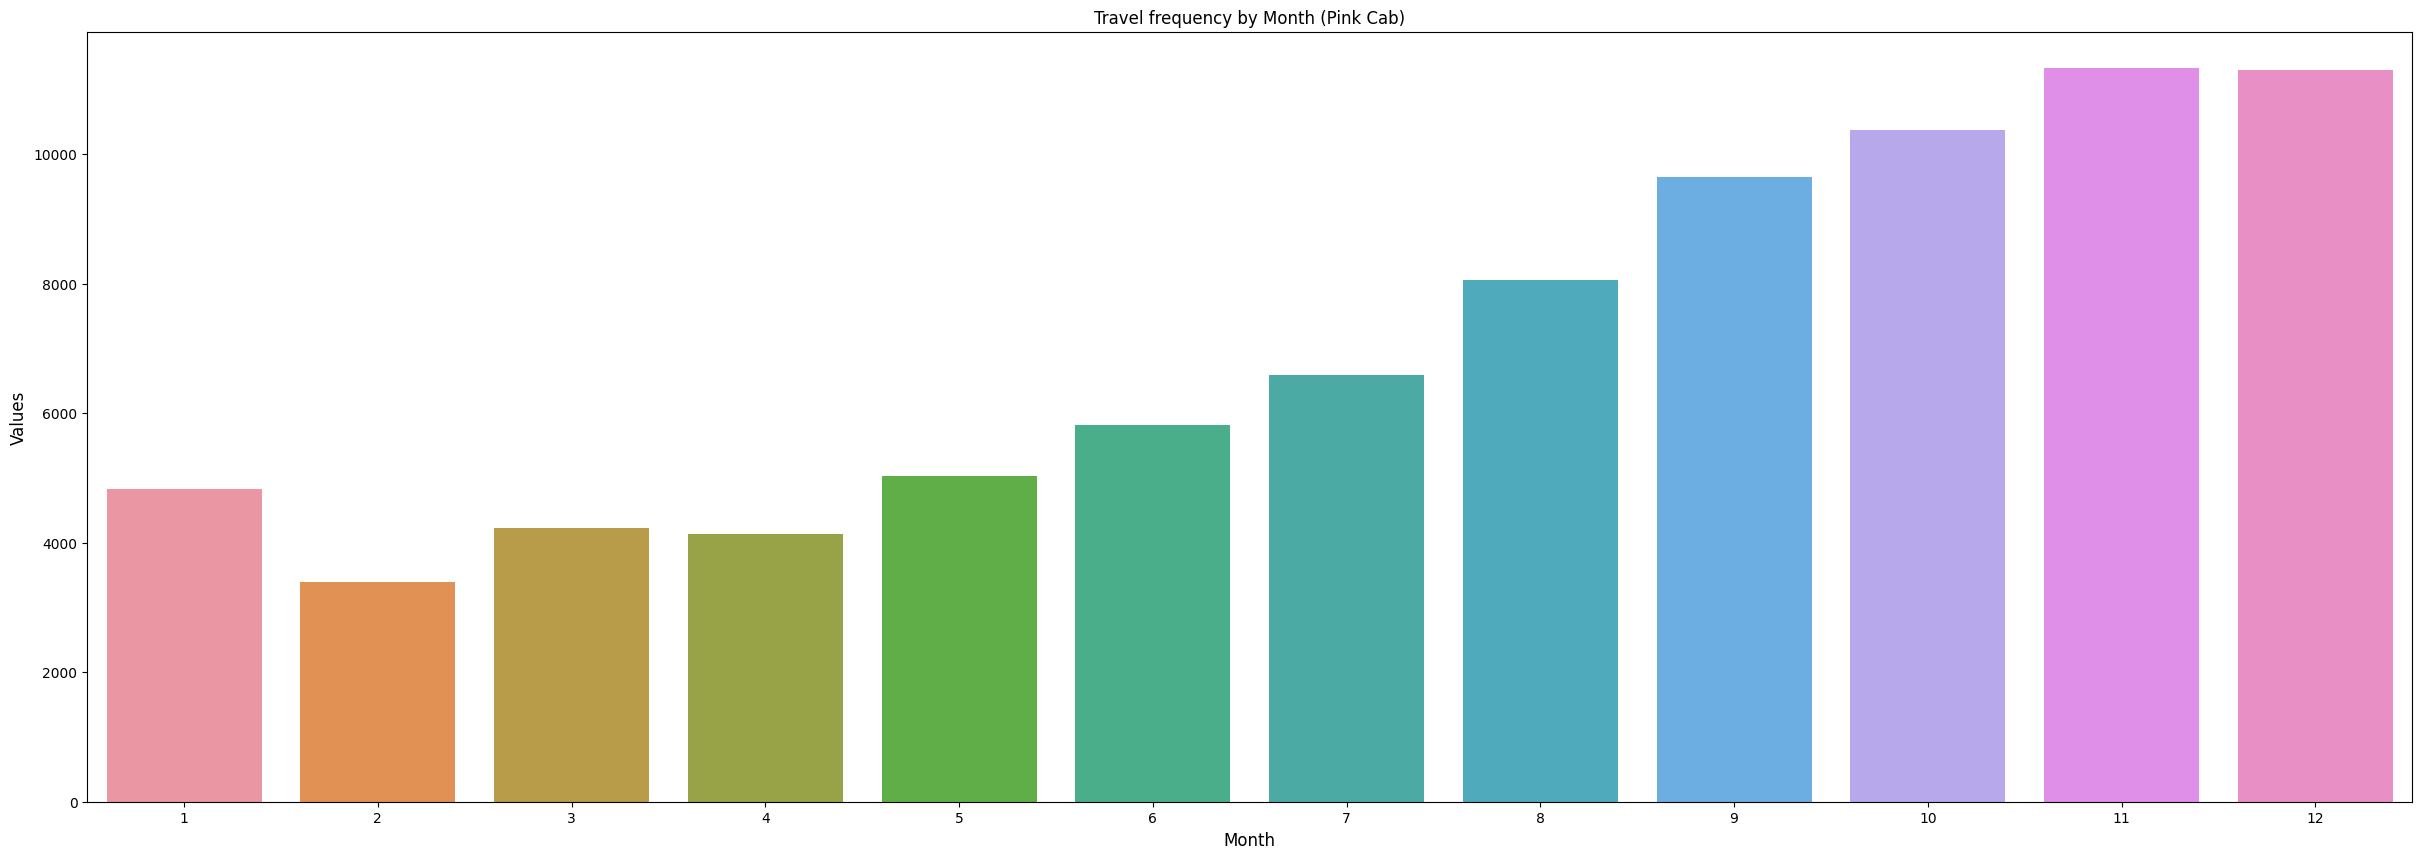

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

# Yellow cab company monthly analysis

In [29]:
plot1 = master_data[master_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1



Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

# Visualize yellow cab company montly analysis

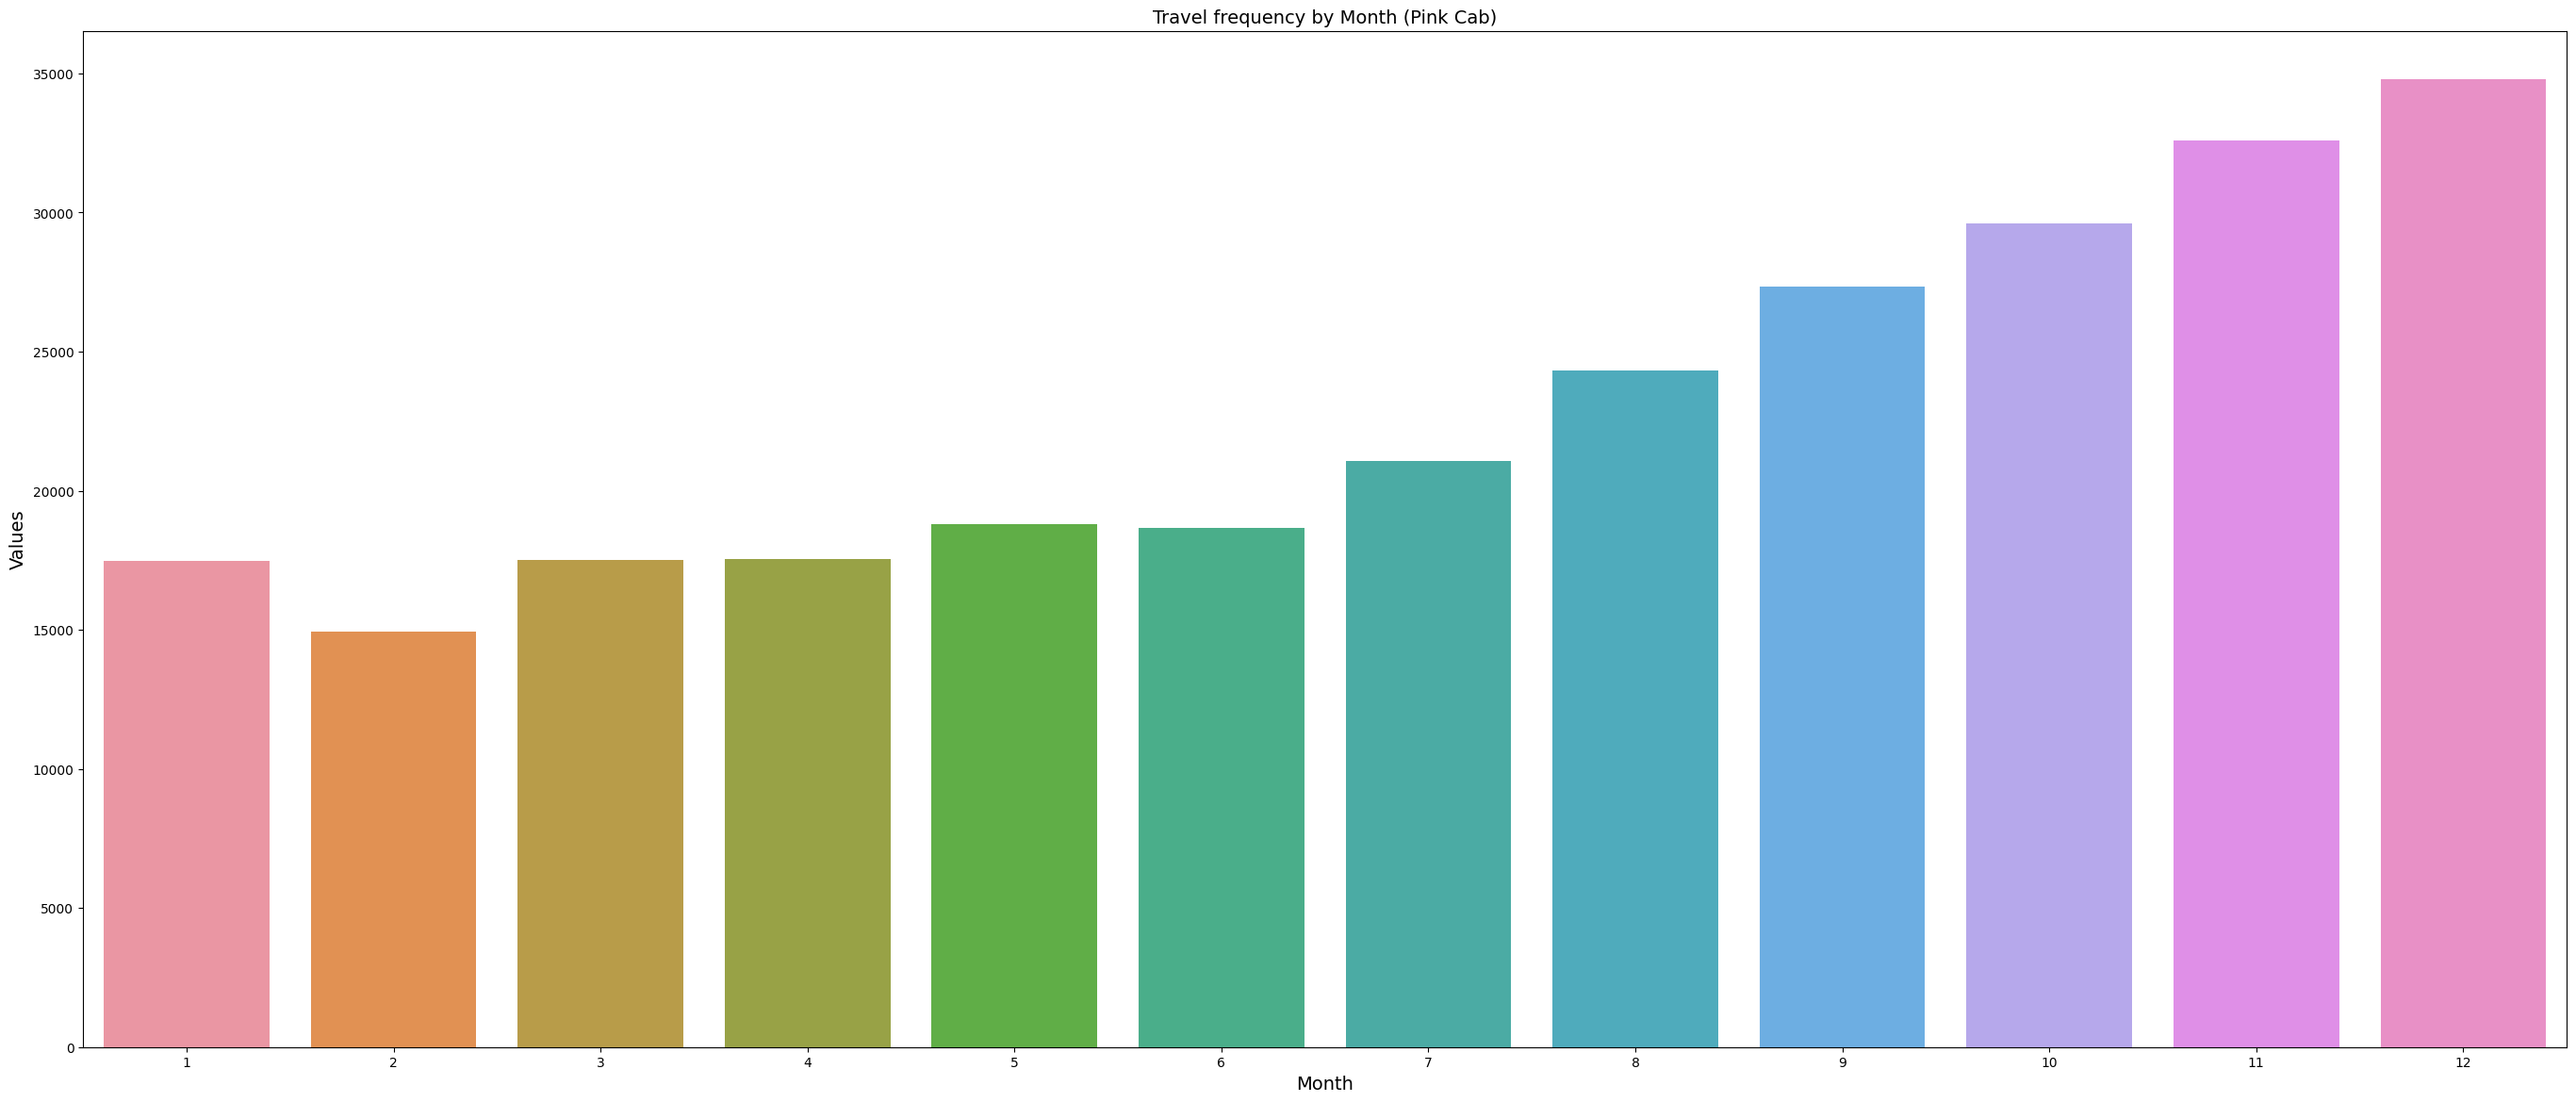

In [30]:
plt.figure(figsize=(34,14))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

# Split km travelled data pink cab yellow cab all data

In [31]:
overall_distance = master_data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

# Describe overall pinkcab yellow cab data

In [32]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df



,Overall,PinkCab,YellowCab
Count,3.593920e+05,84711.000000,274681.000000
Mean,2.936083e-16,-0.000600,0.000185
Std. Dev.,1.000001e+00,0.999802,1.000064
Min,-1.689397e+00,-1.689397,-1.689397
25%,-8.637958e-01,-0.863796,-0.864613
50%,-1.040209e-02,-0.010402,-0.010402
75%,8.495311e-01,0.849531,0.849531
Max,2.078941e+00,2.078941,2.078941


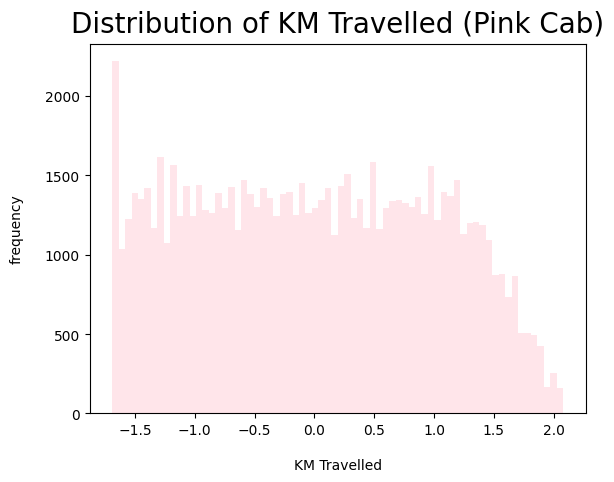

In [33]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='pink', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()


In [34]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)



Text(0, 0.5, 'frequency')

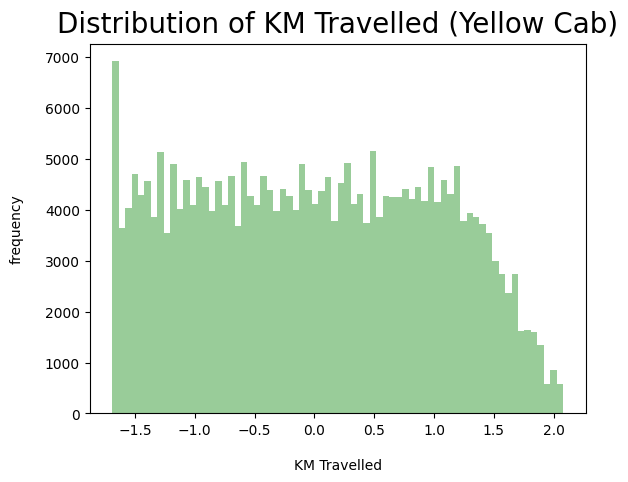

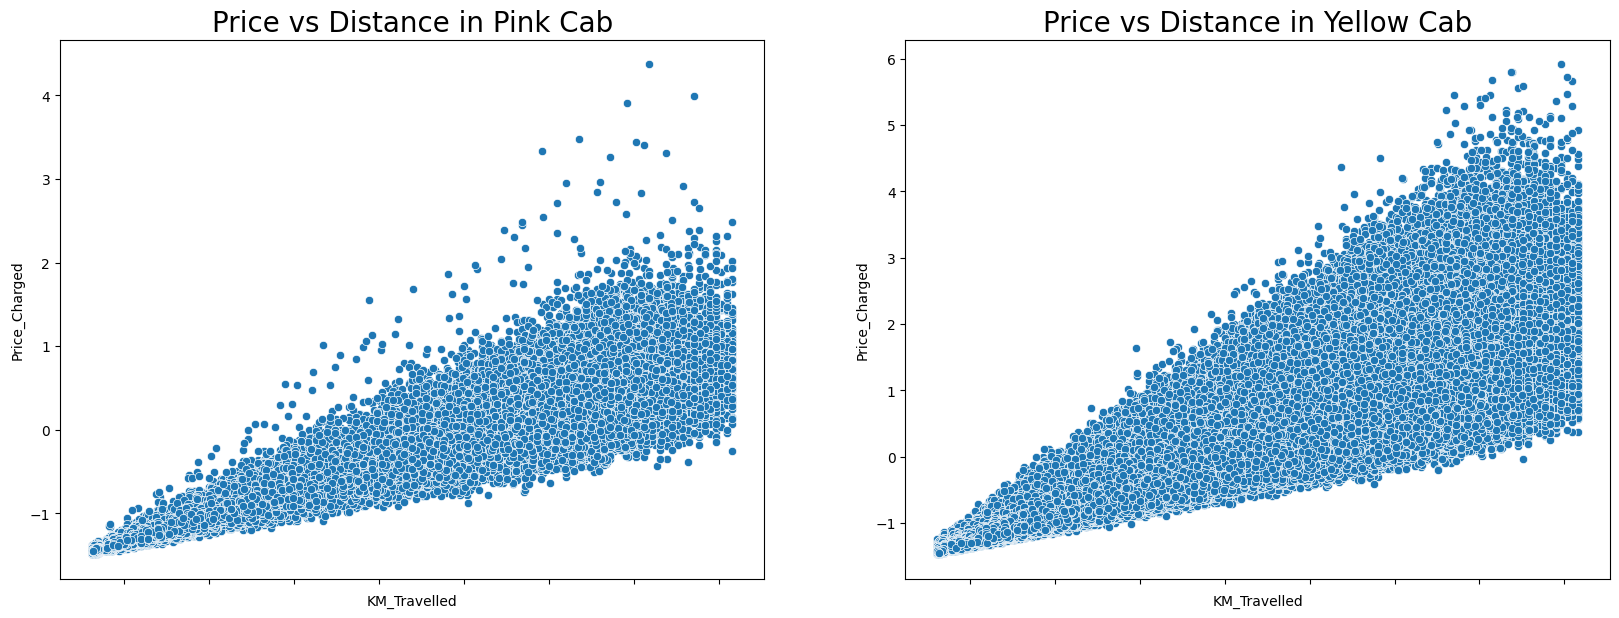

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()


In [36]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])



0.9277652782594853

In [37]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])



0.8597086294478491

## Distance is one of the important factors, which drives the price of the rides.
## We could see that there is a positive correlation in the graph for both Pink and Yellow cab.
## The price for Yellow cab is higher compared to Pink cab.

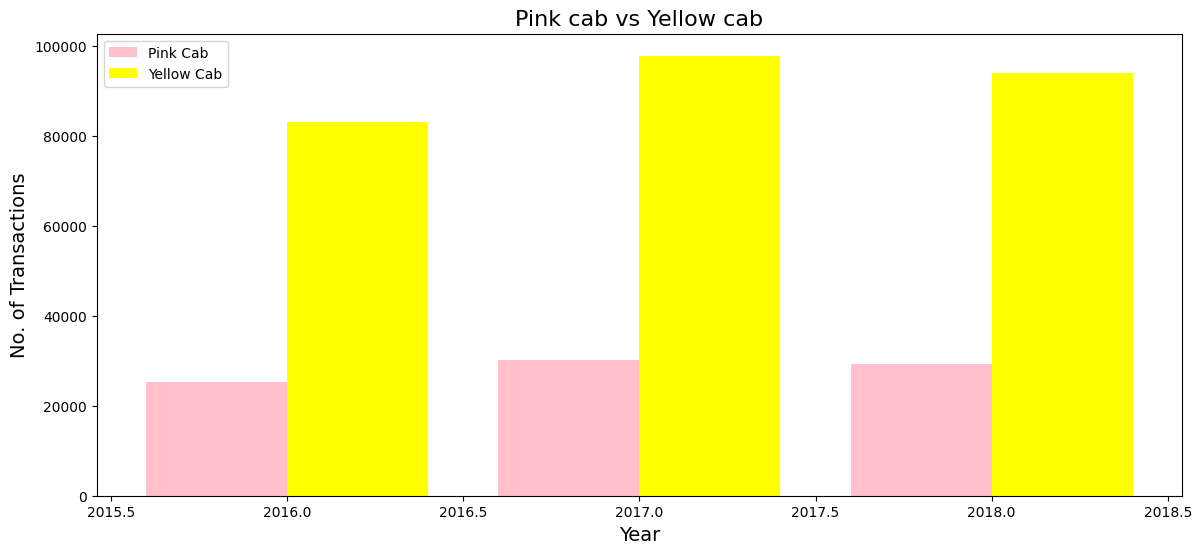

In [38]:
plot1 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

# Distrubution of year Pinkcab 

In [41]:
master_data[master_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()


Year
2016   -0.392134
2017   -0.393282
2018   -0.444296
Name: Price_Charged, dtype: float64

In [42]:
master_data[master_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()


Year
2016   -0.247801
2017   -0.236524
2018   -0.239100
Name: Cost_of_Trip, dtype: float64

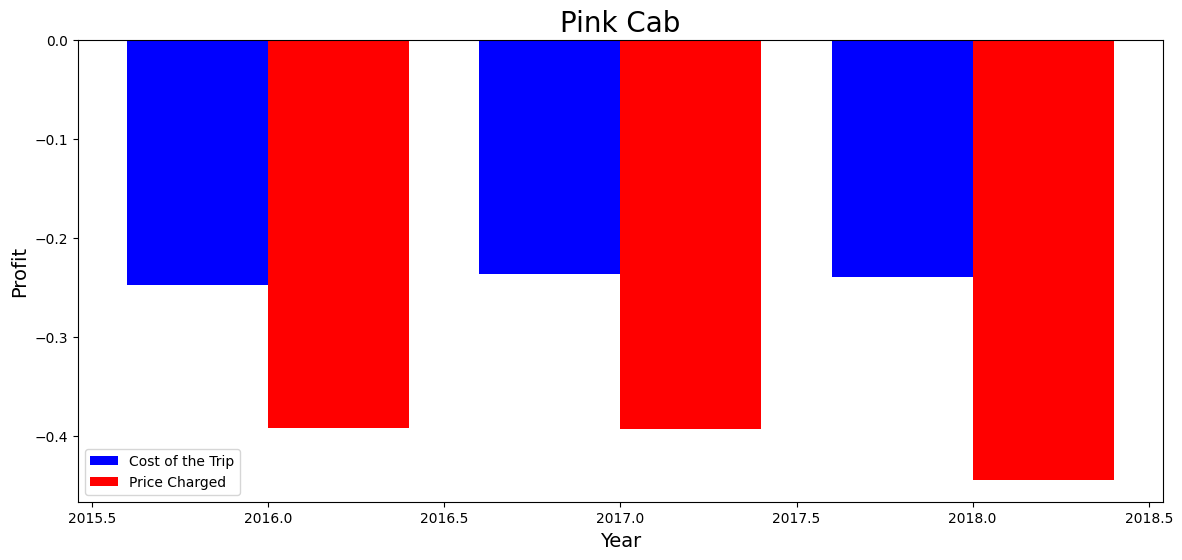

In [44]:
plot1 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = master_data[master_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()



# Yellow cab price charged yearly means value

In [46]:
master_data[master_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()


Year
2016    0.163231
2017    0.156117
2018    0.063598
Name: Price_Charged, dtype: float64

# Yellow cab cost of trip yearly means value

In [48]:
master_data[master_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()


Year
2016    0.078147
2017    0.073873
2018    0.071220
Name: Cost_of_Trip, dtype: float64

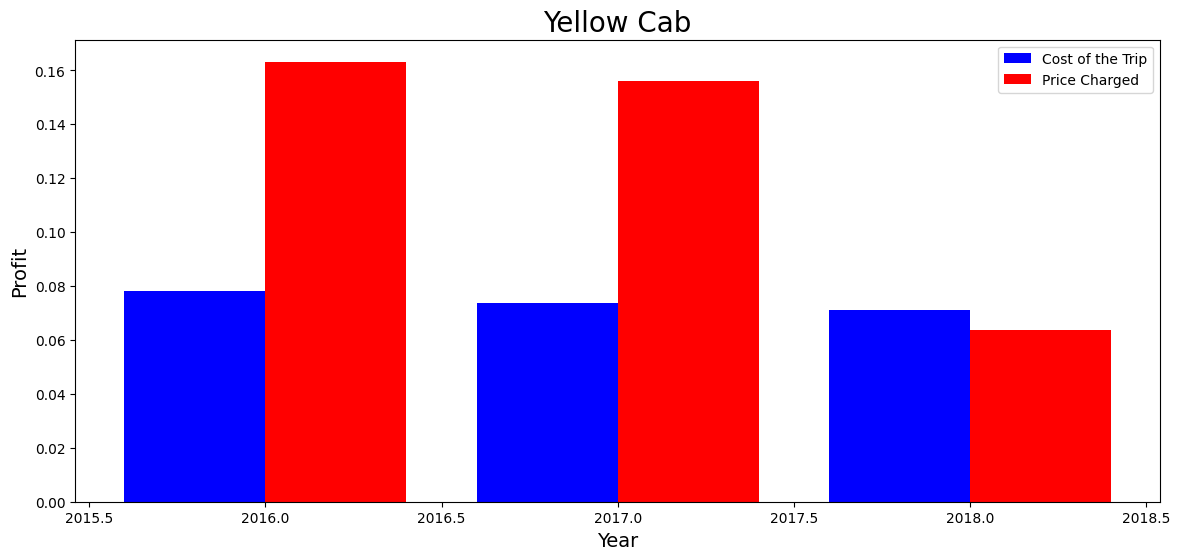

In [49]:
plot1 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = master_data[master_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()


<Figure size 2000x1000 with 0 Axes>

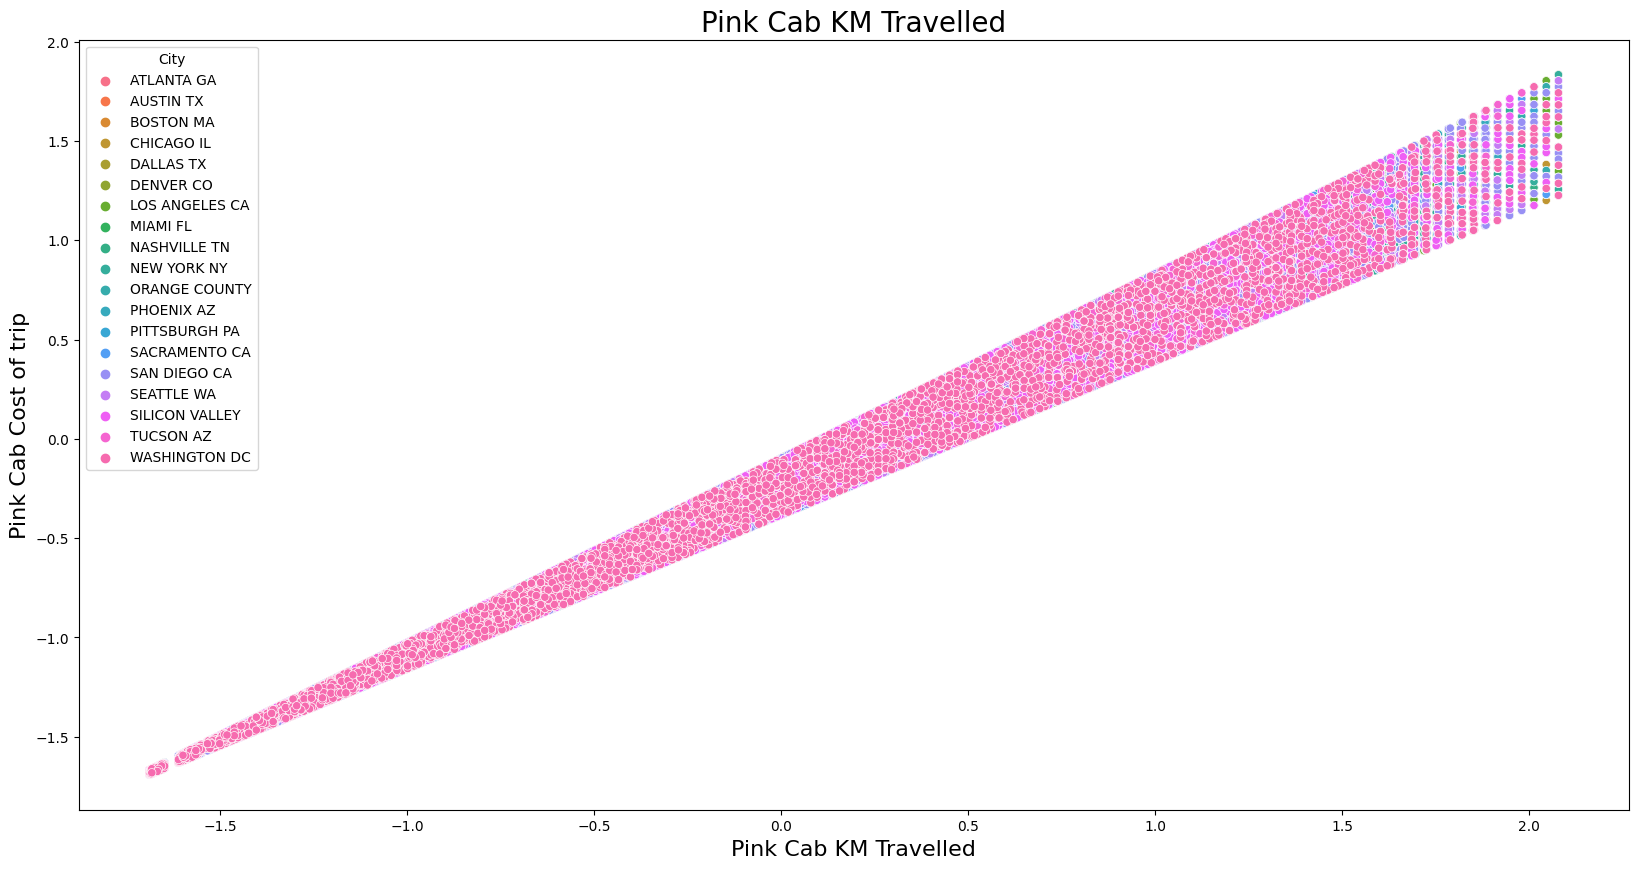

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()


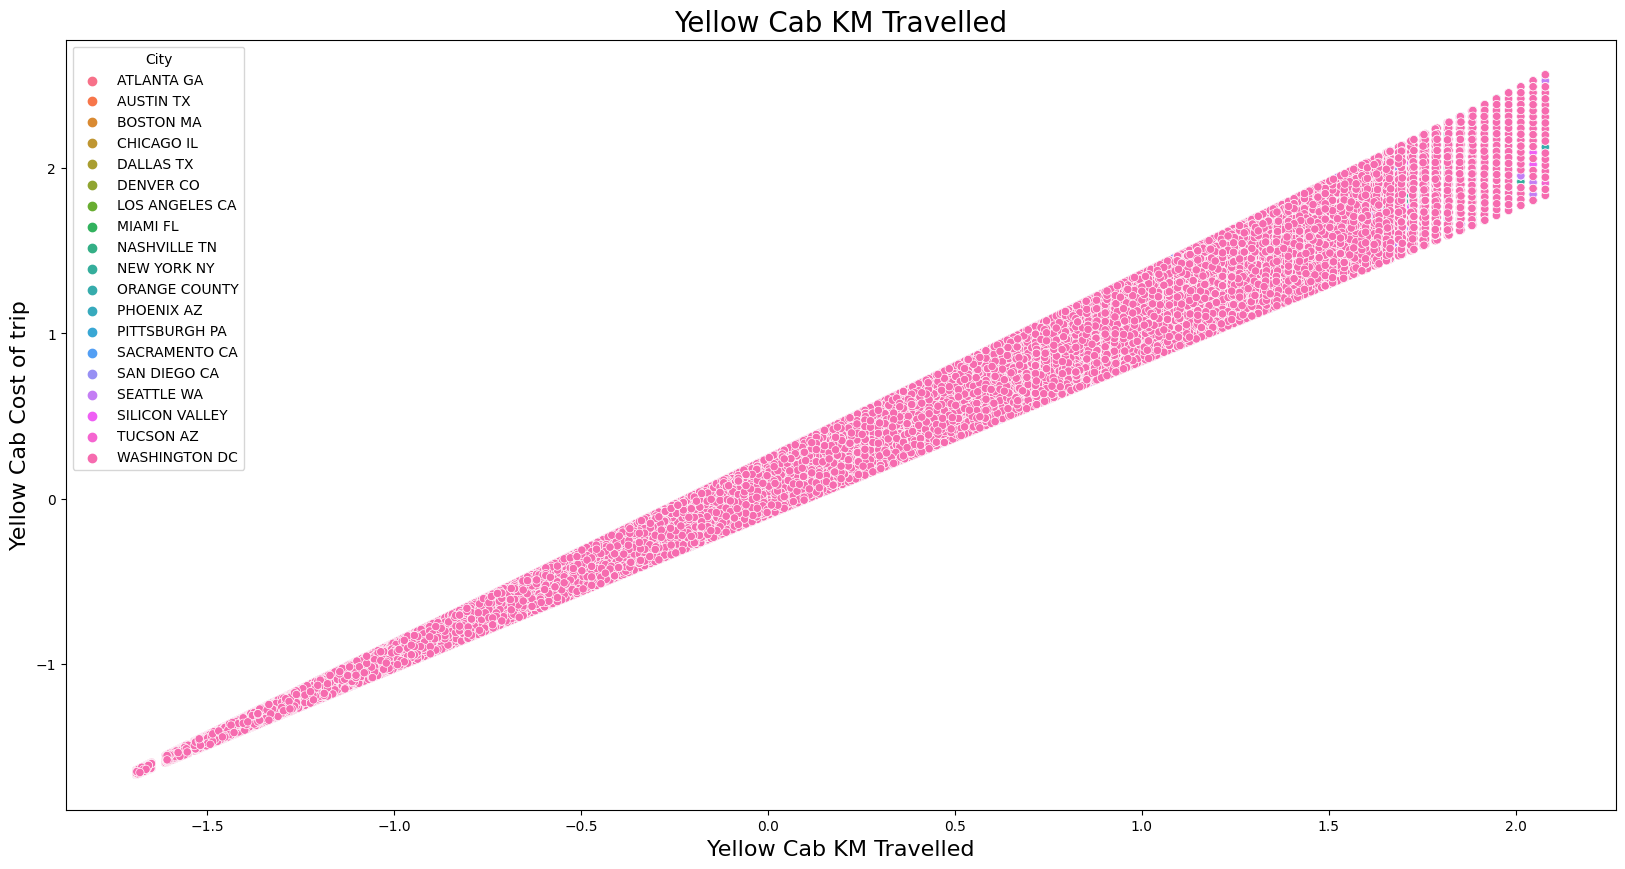

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()


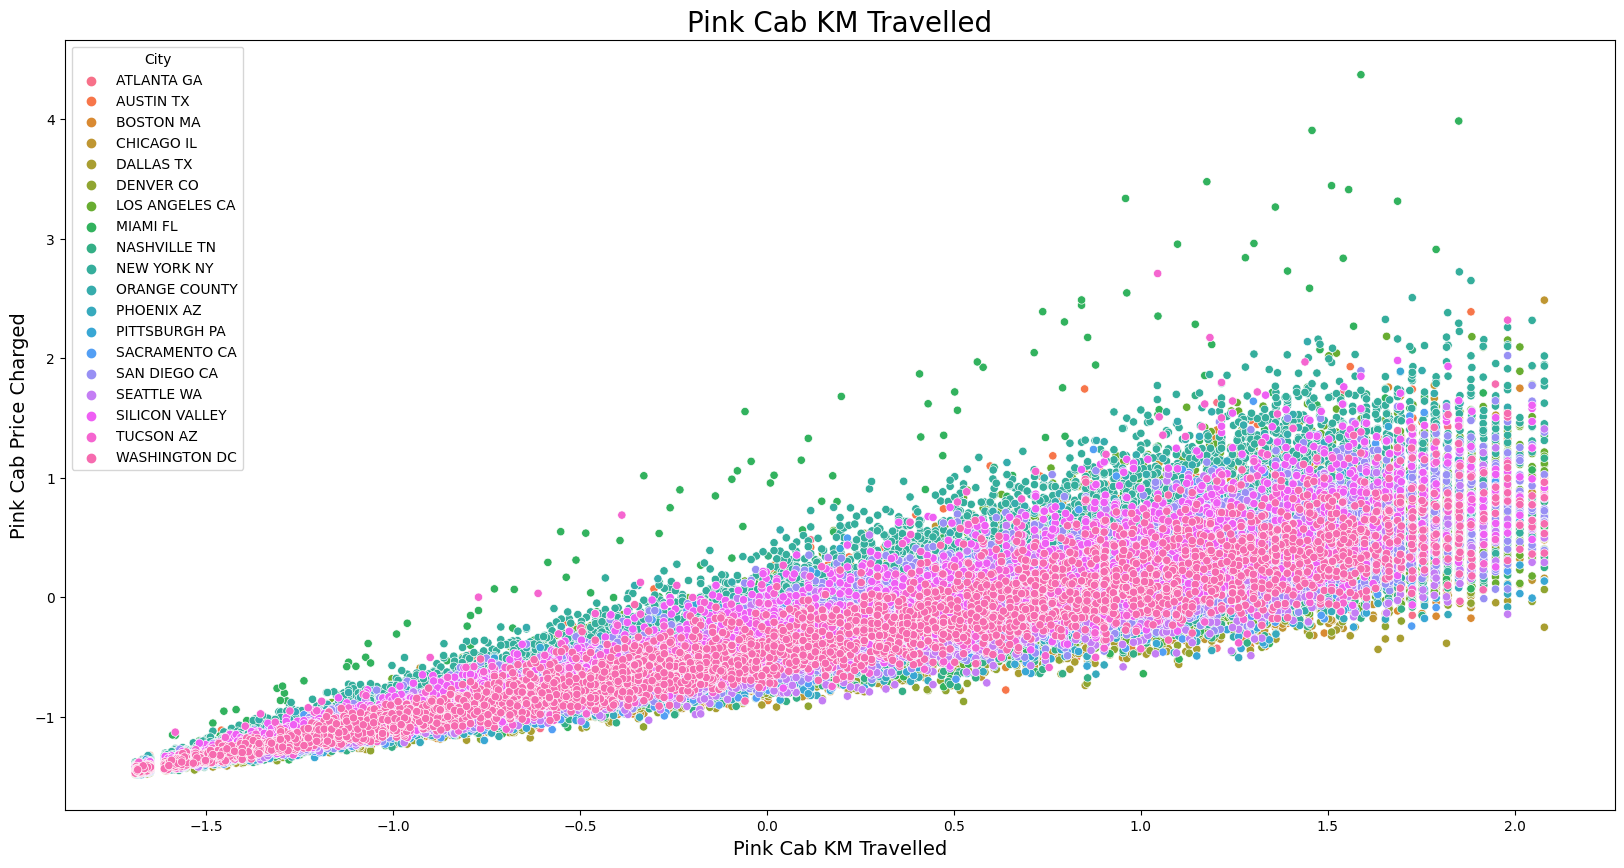

In [53]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()



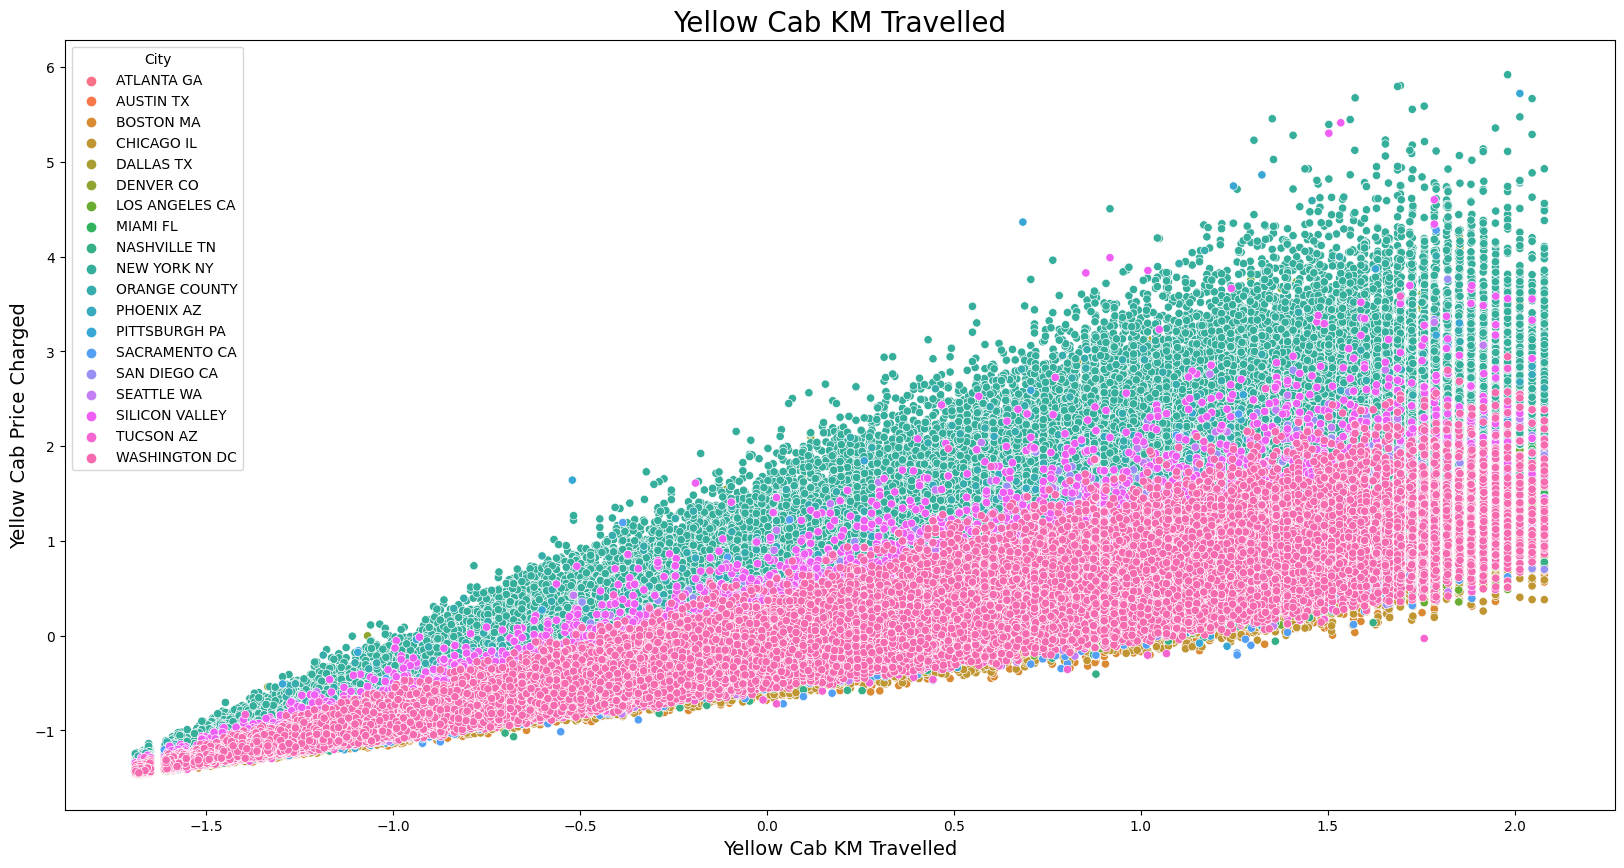

In [54]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=master_data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()


# From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities.
# and for Pink cab all the cities have the same increase in prices with increase in distance
# the outliers exist in both the graphs which may be due to high end cars or weather.